In [36]:
#Nome: Leonardo Rodrigues Miranda Lins
#Nome: Pedro Minicz
#Curso: Banco de dados 6º semestre 12/2020

#Análise de correlação entre status social de doadores à partidos e orientação política de ditos partidos.
#Fonte de dados: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [37]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [38]:
df = pd.read_csv('consulta_cand_2020_SP.csv',encoding='latin-1',sep=';')

In [39]:
df2 = pd.read_csv('bem_candidato_2020_SP.csv',encoding='latin-1',sep=';')

In [102]:
df3 = pd.read_csv('receita_anual_2020_SP.csv',encoding='latin-1',sep=';')

In [40]:
# Número total de candidatos em São José dos Campos eleições 2020.

In [41]:
candidatos = df[(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')]

vereadores = df[(df['CD_CARGO']==13)&(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')]

vice = df[(df['CD_CARGO']==12)&(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')]

prefeito = df[(df['CD_CARGO']==11)&(df['NM_UE']=='SÃO JOSÉ DOS CAMPOS')]

print('Quantidade de candidatos que disputam eleições em São José dos Campos: ',len(candidatos.index))
print('Quantidade de vereadores: ',len(vereadores.index))
print('Quantidade de vices: ',len(vice.index))
print('Quantidade de prefeitos: ',len(prefeito.index))

Quantidade de candidatos que disputam eleições em São José dos Campos:  618
Quantidade de vereadores:  596
Quantidade de vices:  11
Quantidade de prefeitos:  11


In [42]:
#Numero de candidatos por partido

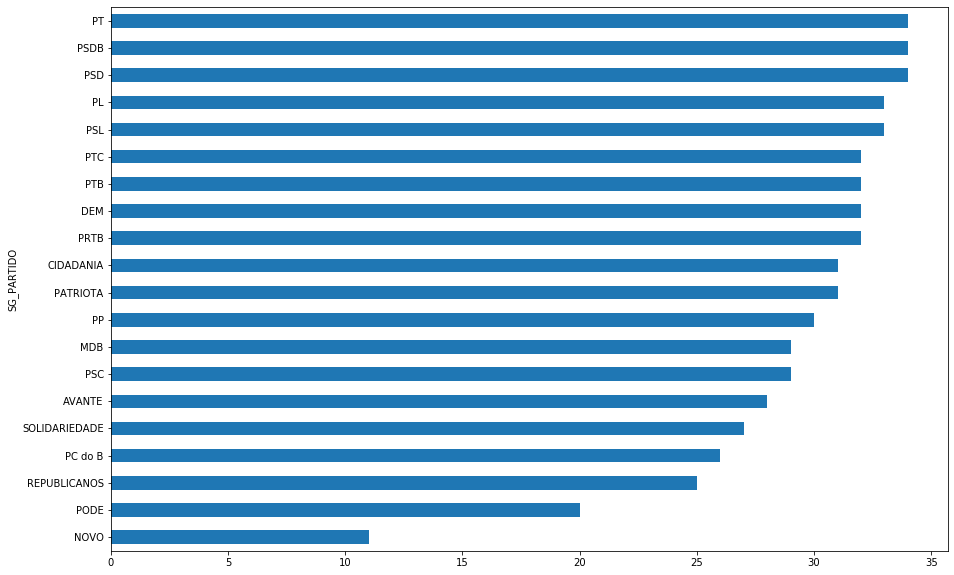

In [46]:
candidatos.groupby('SG_PARTIDO').size().sort_values().tail(20).plot(kind='barh', figsize=(15,10))


In [91]:
bens = pd.merge(df2, candidatos[['SQ_CANDIDATO','NM_CANDIDATO']], on='SQ_CANDIDATO')

In [92]:
bens = bens[['ANO_ELEICAO','SQ_CANDIDATO','NM_CANDIDATO','VR_BEM_CANDIDATO']]

In [93]:
bens['VR_BEM_CANDIDATO']= bens['VR_BEM_CANDIDATO'].str.replace(',', '.').astype('float64')

In [94]:
# Selecionado de modo descendente pelo valor acumulado dos bens para obter os candidatos com maior valor de bens.

In [96]:
final = bens.groupby(['SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().sort_values(ascending=False)

In [97]:
final.head(50)

SQ_CANDIDATO  NM_CANDIDATO                               
250001064096  CONSTANTINO CURY NETO                          12945436.00
250001158049  JOSÉ DE CASTRO COIMBRA                          6554494.00
250000693869  ENSO ROBERTO GURATTI MORAIS                     6275000.00
250000647382  ALEXANDRE BAULÉ                                 3209201.66
250000693456  JOSÉ CLAUDIO MANCILHA DE FARIA BARBOSA          2718419.58
250001016677  PAULO EDUARDO DE MENEZES                        2690000.00
250000693453  JOSE MANCILHA PINTO                             2595050.00
250001044545  LINO BISPO DA ROCHA                             2519000.00
250000693852  ROBERTO KENJI ISHII                             2480006.68
250001044561  PAM WEN LUNG                                    2364079.60
250000637939  SAMUEL GOMES DA SILVA                           2002000.00
250000638724  RENATA LEMES DE PAIVA MENDES DA COSTA           1920000.00
250000637935  DANIEL BRAGA SHOJI                              1789

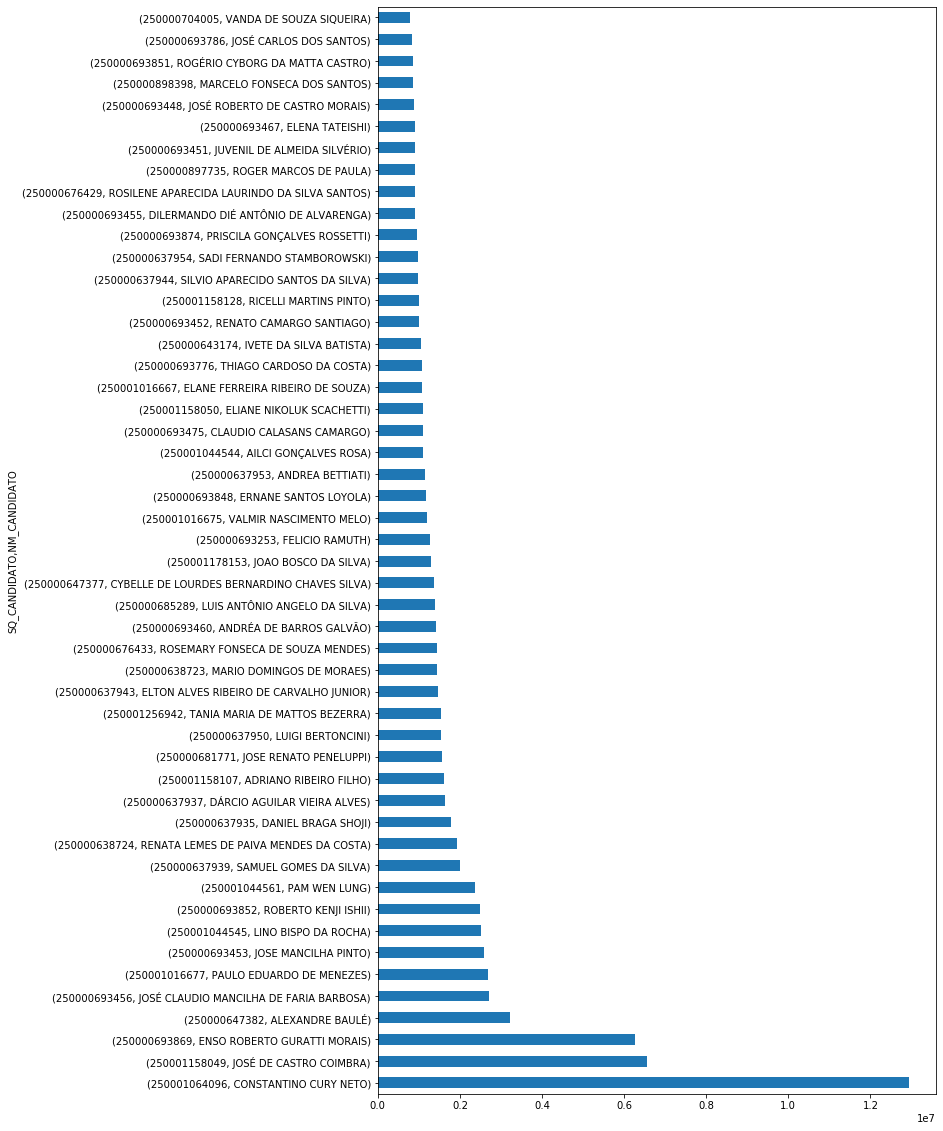

In [98]:
final.head(50).plot(kind='barh', figsize=(10,20))

In [117]:
# Consultando doações

In [168]:
doacoes = df3[(df3['NM_MUNICIPIO_DOADOR']=='SÃO JOSÉ DOS CAMPOS')&((df3['DS_RECEITA']=='DOAÇÕES PARA MANUTENÇÃO DO PARTIDO - PESSOAS FÍSICAS - EM RECURSOS ESTIMÁVEIS EM DINHEIRO') | (df3['DS_RECEITA']=='DOAÇÕES PARA MANUTENÇÃO DO PARTIDO - PESSOAS FÍSICAS - EM RECURSOS FINANCEIROS'))&(df3['VR_RECEITA'])&(df3['NM_PARTIDO'])]

In [137]:
# Numero de doações em São José dos Campos

In [138]:
print('Número de doações em São José dos Campos: ',len(doacoes.index))

Número de doações em São José dos Campos:  45


In [169]:
doacoes = doacoes[['NM_PARTIDO', 'VR_RECEITA']]

In [166]:
#Valores doados 

In [189]:
doacoes['VR_RECEITA'] = doacoes['VR_RECEITA'].astype('float64')

finalDoacoes = doacoes.groupby(['NM_PARTIDO']).sum()


In [190]:
finalDoacoes

,NM_PARTIDO,VR_RECEITA
985,CIDADANIA,840.0
986,CIDADANIA,200.0
987,CIDADANIA,840.0
988,CIDADANIA,22000.0
989,CIDADANIA,100.0
990,CIDADANIA,100.0
991,CIDADANIA,100.0
1013,CIDADANIA,350.0
1014,CIDADANIA,840.0
1015,CIDADANIA,840.0
